In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [18]:
data = pd.read_csv('Clean_inventory_data1.csv')
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,...,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage,Expired,Shelf_Life_Dayes,Revenue,Inventory_Status
0,0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,2024-03-01,2025-01-06,...,64,17,4.6,96,55,1.96%,True,336,441.6,Sufficient
1,1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,2024-04-01,2024-05-19,...,87,86,2.0,24,83,0.91%,True,71,48.0,Sufficient
2,2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,2024-04-01,2024-12-21,...,67,66,12.0,35,24,1.36%,True,7,420.0,Sufficient
3,3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,2024-05-01,2024-12-12,...,60,98,1.5,44,95,1.36%,True,148,66.0,Sufficient
4,4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,2024-05-01,2024-07-28,...,22,89,7.0,91,77,2.17%,True,19,637.0,Sufficient


In [19]:
df.isnull().sum()

Unnamed: 0                 0
Product_Name               0
Catagory                   0
Supplier_Name              0
Warehouse_Location         0
Status                     0
Product_ID                 0
Supplier_ID                0
Date_Received              0
Last_Order_Date            0
Expiration_Date            0
Stock_Quantity             0
Reorder_Level              0
Reorder_Quantity           0
Unit_Price                 0
Sales_Volume               0
Inventory_Turnover_Rate    0
percentage                 0
Expired                    0
Shelf_Life_Dayes           0
Revenue                    0
Inventory_Status           0
dtype: int64

In [20]:
df.columns

Index(['Unnamed: 0', 'Product_Name', 'Catagory', 'Supplier_Name',
       'Warehouse_Location', 'Status', 'Product_ID', 'Supplier_ID',
       'Date_Received', 'Last_Order_Date', 'Expiration_Date', 'Stock_Quantity',
       'Reorder_Level', 'Reorder_Quantity', 'Unit_Price', 'Sales_Volume',
       'Inventory_Turnover_Rate', 'percentage', 'Expired', 'Shelf_Life_Dayes',
       'Revenue', 'Inventory_Status'],
      dtype='object')

In [21]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# 2. Address negative shelf life values
df["Shelf_Life_Dayes"] = df["Shelf_Life_Dayes"].apply(lambda x: max(x, 0))

In [22]:
df.describe()

,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,Shelf_Life_Dayes,Revenue
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,55.595551,51.245703,51.896866,5.862892,58.948433,50.165824,61.218402,345.675976
std,26.310629,29.094069,29.531557,6.201248,23.002384,28.809489,87.146410,404.822817
min,10.000000,1.000000,1.000000,0.200000,20.000000,1.000000,0.000000,6.600000
25%,33.000000,26.000000,25.000000,2.500000,39.000000,25.000000,0.000000,130.000000
50%,56.000000,53.000000,54.000000,4.200000,58.000000,50.000000,0.000000,231.000000
75%,79.000000,77.000000,77.000000,7.000000,78.000000,75.000000,101.000000,408.500000
max,100.000000,100.000000,100.000000,98.430000,100.000000,100.000000,344.000000,4707.640000


C:\Users\deepa\AppData\Local\Temp\ipykernel_3940\1250682589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Catagory'].value_counts().index,y = df['Catagory'].value_counts().values,palette = 'coolwarm')


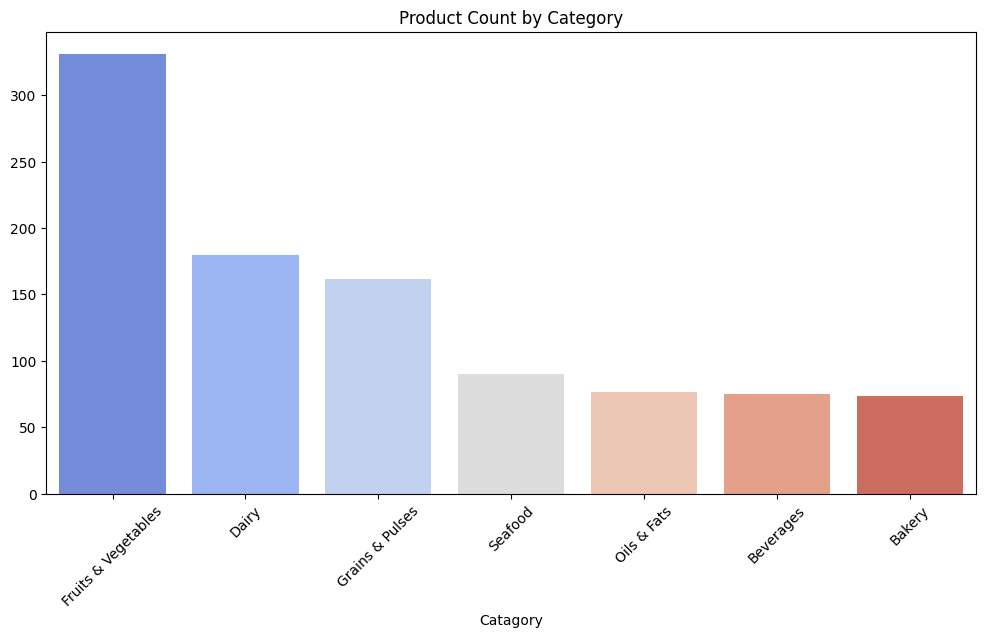

In [23]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12,6))
sns.barplot(x = df['Catagory'].value_counts().index,y = df['Catagory'].value_counts().values,palette = 'coolwarm')
plt.xticks(rotation = 45)
plt.title('Product Count by Category')
plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_3940\1771506178.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Sales_Volume',y = 'Product_Name',data=Top_Selling,palette = 'viridis')


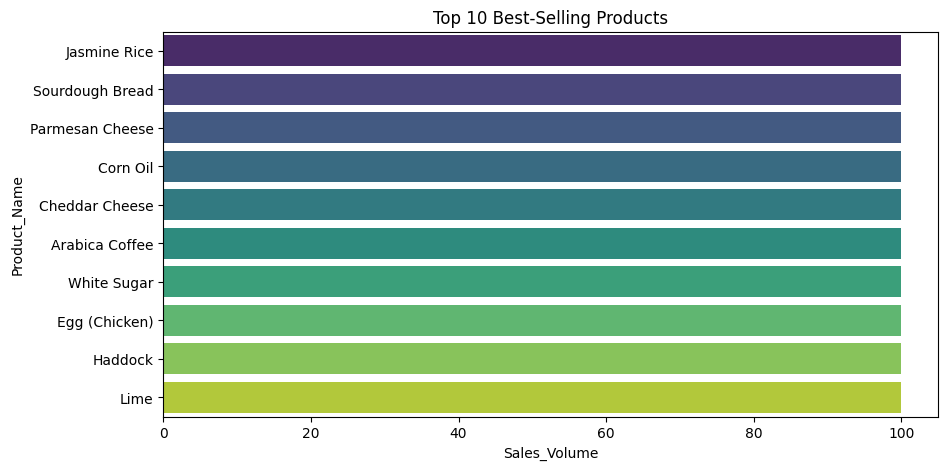

In [24]:
# Top 10 best-selling products
Top_Selling = df[['Product_Name','Sales_Volume']].sort_values(by = 'Sales_Volume',ascending= False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x= 'Sales_Volume',y = 'Product_Name',data=Top_Selling,palette = 'viridis')
plt.title('Top 10 Best-Selling Products')
plt.show()

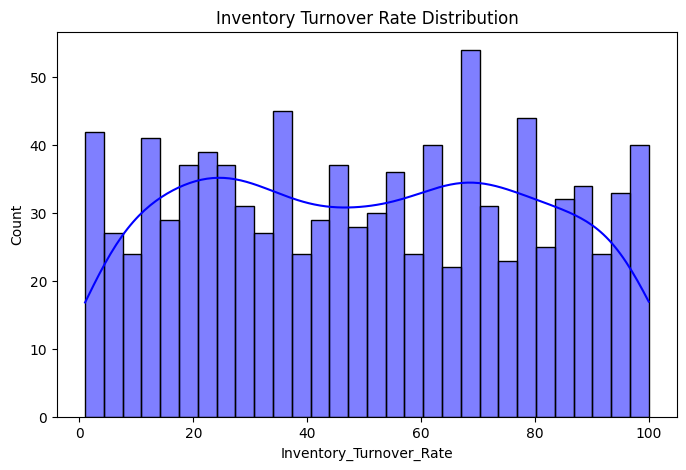

In [25]:
# Inventory Turnover Rate distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Inventory_Turnover_Rate'], bins =30, kde= True,color = 'blue')
plt.title('Inventory Turnover Rate Distribution')
plt.show()

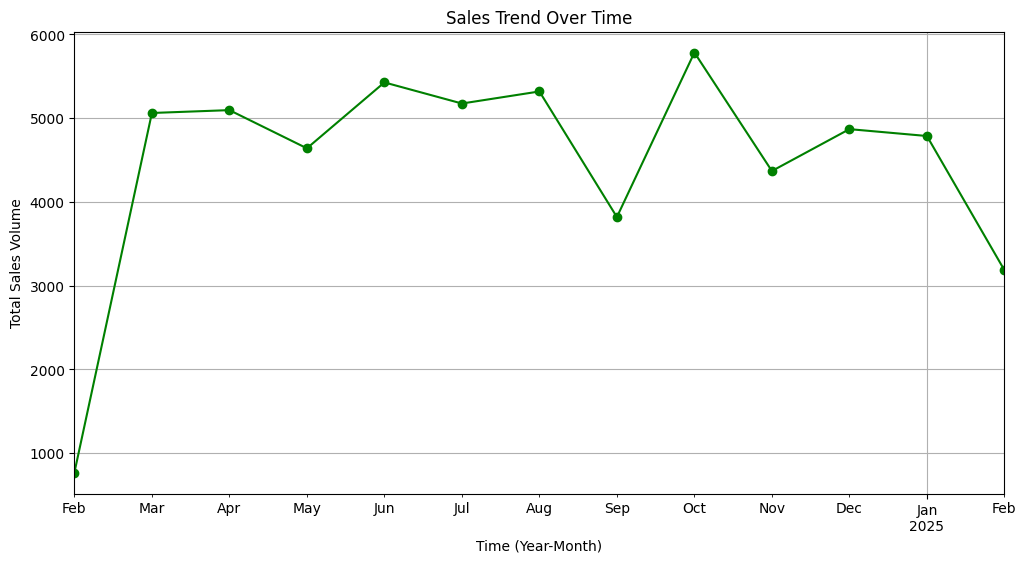

In [26]:
# Sales Trend Over Time
if 'Date_Received' in df.columns:
    # Convert 'Date_Received' to datetime format
    df['Date_Received'] = pd.to_datetime(df['Date_Received'], errors='coerce')
    
    # Check for any invalid dates
    if df['Date_Received'].isnull().any():
        print("Warning: Some dates in 'Date_Received' could not be converted and are set to NaT.")
    
    df['YearMonth'] = df['Date_Received'].dt.to_period('M')
    sales_trend = df.groupby('YearMonth')['Sales_Volume'].sum()
    sales_trend.plot(kind='line', marker='o', figsize=(12, 6), color='green')
    plt.title("Sales Trend Over Time")
    plt.ylabel("Total Sales Volume")
    plt.xlabel("Time (Year-Month)")
    plt.grid()
    plt.show()

### **📈 Sales Trend Over Time – Key Insights**  
1. **Sharp increase in sales** from February to March, stabilizing around 5000 units.  
2. **Fluctuations observed**, with notable peaks in June and October.  
3. **September shows a decline**, possibly due to seasonal factors or demand shifts.  
4. **January and February (2025) show a downward trend**, suggesting a need for sales strategy adjustments. 

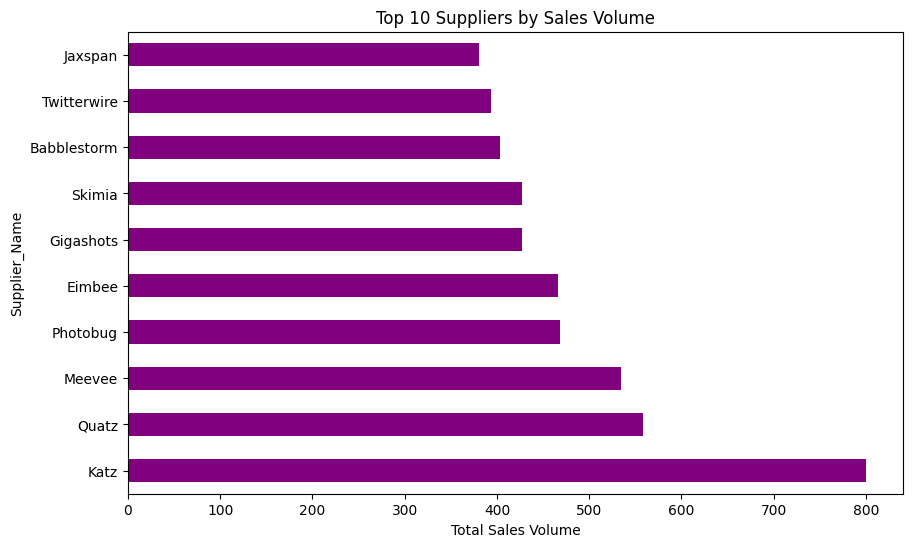

In [27]:
# Supplier Performance
supplier_performance = df.groupby('Supplier_Name')['Sales_Volume'].sum().sort_values(ascending=False).head(10)
supplier_performance.plot(kind='barh', figsize=(10,6), color='purple')
plt.title("Top 10 Suppliers by Sales Volume")
plt.xlabel("Total Sales Volume")
plt.show()


Model Evaluation:
MAE: 19.74
MSE: 539.70
RMSE: 23.23
R² Score: -0.07


C:\Users\deepa\AppData\Local\Temp\ipykernel_3940\3188580950.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_model.feature_importances_, y=features, palette='viridis')


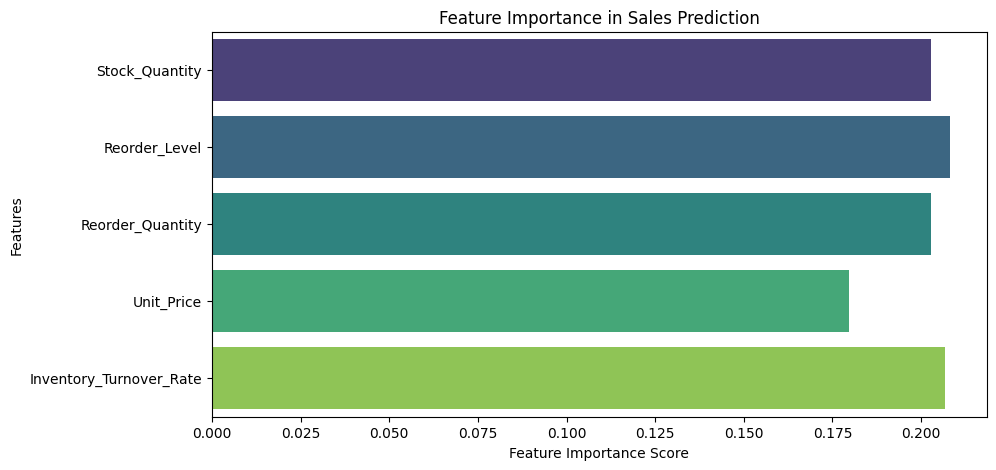

In [32]:
# Define the target variable
target = 'Sales_Volume'

# Handle missing values (if any)
df.dropna(subset=[target], inplace=True)  # Drop rows where target (Sales Volume) is missing

# Fill missing values in numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Define features
features = ['Stock_Quantity', 'Reorder_Level', 'Reorder_Quantity', 'Unit_Price', 'Inventory_Turnover_Rate']

# Splitting data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (for better model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning for RandomForestRegressor
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Train the optimized model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict sales volume
y_pred = best_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:\nMAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nR² Score: {r2:.2f}")

# Feature Importance Visualization
plt.figure(figsize=(10,5))
sns.barplot(x=best_model.feature_importances_, y=features, palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Sales Prediction")
plt.show()

### **Inventory and Sales Analysis – Key Takeaways**  

#### **📌 Data Overview**  
- **Total Products:** 989  
- **Key Metrics:** Stock levels, sales volume, revenue, turnover rate, and shelf life  

#### **🔹 Inventory & Stock Trends**  
- **Mean Stock Quantity:** 55.6 units (range: 10-100) → Some products overstocked or slow-moving  
- **Reorder Level:** 51 units (low values indicate low demand or specialty items)  

#### **🔹 Sales Performance**  
- **Mean Sales Volume:** 58.95 units (range: 20-100) → High variance in product performance  
- **Revenue:** ₹345.67 (mean) | ₹4707.64 (max) → A few products drive most revenue  

#### **🔹 Turnover & Shelf Life Insights**  
- **Turnover Rate:** 50.16 (some as low as 1) → Indicates stagnant stock  
- **Shelf Life:** 61.2 days (25% ≤ 25 days) → Risk of wastage  

#### **✅ Recommendations**  
- **Stock Optimization:** Reduce overstocking and adjust reorder levels  
- **Sales Strategy:** Promote slow-moving items, focus on high-revenue products  
- **Turnover Improvement:** Prioritize fast-selling products, refine demand forecasting  
- **Shelf Life Management:** Use dynamic pricing and predictive analytics  

#### **📊 Sales Trends & Supplier Analysis**  
- **Sales Peak:** February-March, fluctuations in June, October  
- **Top Suppliers:** Katz, Quatz, Meevee → Key partners for growth  
- **Underperforming Supplier:** Jaxspan → Needs assessment and improvement  

#### **📈 Sales Prediction Insights**  
- **Most Influential Factor:** Stock availability  
- **Other Key Factors:** Reorder level, pricing, inventory turnover  
- **Actionable Steps:** Optimize stock levels, refine pricing, enhance turnover efficiency  

These insights will help **boost sales, optimize inventory, and reduce costs** for long-term success. 🚀